In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy as sp
import sklearn as sk

from pandas.plotting import autocorrelation_plot
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

In [35]:
STOCK_NAMES = ['AAPL','MSFT','AMZN','GOOG','BRKB',
              'FB','JNJ','JPM','XOM','V','WMT','BAC',
              'UNH','PFE','WFC','VZ','PG','CVX','T',
              'INTC','CSCO','HD','MA','KO','BA',
              'MRK','ORCL','DIS','CMCSA','PEP','C',
              'MCD','PM','DWDP','ABBV','NFLX','MDT',
              'ABT','NVDA','AMGN','NKE','ADBE','MO','LLY',
              'MMM','IBM','HON','UNP','ACN',
              'UTX']

PROJECT_PATH = '/pine/scr/s/i/siyangj/DeepStock/FinalProject/'
DATA_PATH = os.path.join(PROJECT_PATH,'Data/')

VOLUME_NORMALIZATION_ID = 'VOLUME_NORMALIZATION'

DATA = os.path.join(DATA_PATH,'clean.h5')
DATA_ID = 'CLEAN_DATA'

PREPROCESS = os.path.join(DATA_PATH,'preprocessed_1.h5')
PREPROCESS_ID = 'DATA_PREPROCESSED_1'

NUM_DAYS = 5
NUM_PER_DAY = 389
NUM_STOCKS = 50
NUM_PER_STOCK = 5

In [6]:
df = pd.read_hdf(DATA,DATA_ID)

In [7]:
df

AAPL                                      \
                           open        high         low       close   
Time                                                                  
2018-11-05 09:31:00  204.250000  204.280000  203.040000  203.180000   
2018-11-05 09:32:00  203.210000  203.460000  202.310000  202.435100   
2018-11-05 09:33:00  202.495000  202.740000  201.646000  202.140000   
2018-11-05 09:34:00  202.170000  202.450000  201.770100  202.420000   
2018-11-05 09:35:00  202.450000  203.385000  202.410000  203.120000   
2018-11-05 09:36:00  203.000000  203.127900  202.581000  202.976400   
2018-11-05 09:37:00  202.949500  202.970000  202.630000  202.940000   
2018-11-05 09:38:00  202.910000  203.080000  202.500000  202.600000   
2018-11-05 09:39:00  202.590000  202.610000  202.210000  202.255300   
2018-11-05 09:40:00  202.265600  203.000000  202.200000  202.215000   
2018-11-05 09:41:00  202.209300  202.510000  201.870100  202.120000   
2018-11-05 09:42:00  202.090000  202.250000  201.810000  201.810000   
2018-11-05 09:43:00  201.830000  201.830000  201.495000  201.635000   
2018-11-05 09:44:00  201.640000  201.900000  201.540000  201.810000   
2018-11-05 09:45:00  201.800000  202.069000  201.601400  201.796500   
2018-11-05 09:46:00  201.800000  201.875000  201.540000  201.820000   
2018-11-05 09:47:00  201.826300  202.200000  201.700000  201.860000   
2018-11-05 09:48:00  201.850000  202.129900  201.750000  201.950000   
2018-11-05 09:49:00  201.970000  202.028200  201.790000  201.840000   
2018-11-05 09:50:00  201.850000  201.920000  201.370000  201.540000   
2018-11-05 09:51:00  201.520000  202.050000  201.490000  201.955000   
2018-11-05 09:52:00  201.940000  201.940000  201.550000  201.720000   
2018-11-05 09:53:00  201.729900  201.880000  201.470000  201.850000   
2018-11-05 09:54:00  201.840000  201.880000  201.500000  201.590000   
2018-11-05 09:55:00  201.500000  201.930000  201.330000  201.610000   
2018-11-05 09:56:00  201.690000  201.720000  201.430000  201.670000   
2018-11-05 09:57:00  201.600000  201.600000  201.181000  201.210000   
2018-11-05 09:58:00  201.185000  201.330000  200.910000  201.210000   
2018-11-05 09:59:00  201.215000  201.215000  201.040000  201.090000   
2018-11-05 10:00:00  201.130000  201.130000  200.840000  201.040000   
...                         ...         ...         ...         ...   
2018-11-09 15:31:00  204.320000  204.380000  204.270000  204.325000   
2018-11-09 15:32:00  204.300000  204.320000  204.140000  204.270000   
2018-11-09 15:33:00  204.260000  204.410000  204.230000  204.410000   
2018-11-09 15:34:00  204.275784  204.417533  204.275784  204.396990   
2018-11-09 15:35:00  204.300000  204.360000  204.290000  204.290000   
2018-11-09 15:36:00  204.270000  204.350000  204.240000  204.280000   
2018-11-09 15:37:00  204.280000  204.430000  204.280000  204.380000   
2018-11-09 15:38:00  204.420000  204.490000  204.340000  204.430000   
2018-11-09 15:39:00  204.400000  204.430100  204.150000  204.430100   
2018-11-09 15:40:00  204.380000  204.430000  204.350000  204.380000   
2018-11-09 15:41:00  204.380000  204.520000  204.360000  204.400000   
2018-11-09 15:42:00  204.395000  204.430000  204.350000  204.420000   
2018-11-09 15:43:00  204.400000  204.482000  204.360000  204.482000   
2018-11-09 15:44:00  204.500000  204.510000  204.440000  204.470000   
2018-11-09 15:45:00  204.711196  204.711196  204.437424  204.480082   
2018-11-09 15:46:00  204.744400  204.744400  204.400000  204.480500   
2018-11-09 15:47:00  204.470000  204.510000  204.370000  204.420000   
2018-11-09 15:48:00  204.420000  204.440000  204.260000  204.370000   
2018-11-09 15:49:00  204.400000  204.470000  204.360000  204.385000   
2018-11-09 15:50:00  204.405000  204.470000  204.350000  204.440000   
2018-11-09 15:51:00  204.460000  204.510000  204.350000  204.380000   
2018-11-09 15:52:00  204.360100  204.486900  204.340000  204.420000   
2018-11-09 15:53:00  204.410000  204.440000  204.36

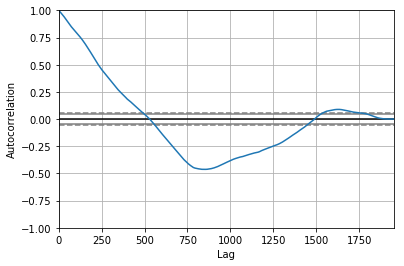

In [8]:
autocorrelation_plot(df.iloc[:,0])

In [20]:
train_index = np.arange(0,NUM_PER_DAY*(NUM_DAYS-1))
test_index = np.arange(NUM_PER_DAY*(NUM_DAYS-1),NUM_PER_DAY*NUM_DAYS)

train_X0_df = df.iloc[train_index,0]
test_X0_df = df.iloc[test_index,0]
train_X0 = train_X0_df.values
test_X0 = test_X0_df.values

In [39]:
pr_data = pd.read_hdf(PREPROCESS,PREPROCESS_ID)

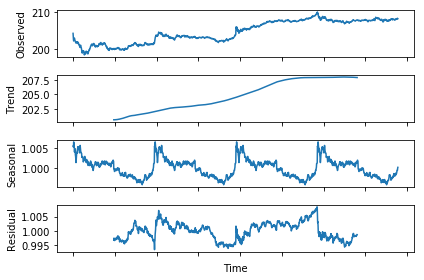

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_X0_df, model='multiplicative',freq=NUM_PER_DAY+1)
fig = result.plot()

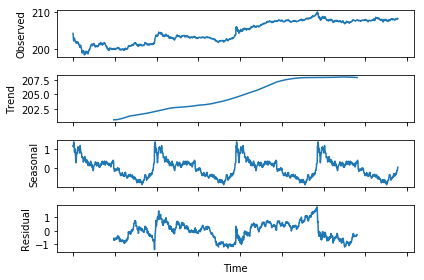

In [37]:
result = seasonal_decompose(train_X0_df, model='additive',freq=NUM_PER_DAY+1)
fig = result.plot()

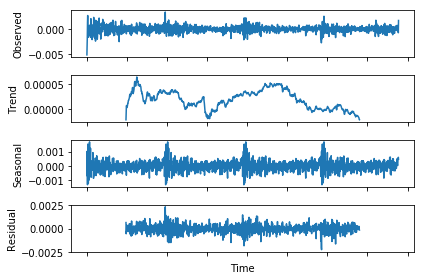

In [40]:
result = seasonal_decompose(pr_data.iloc[train_index,0], model='additive',freq=NUM_PER_DAY+1)
fig = result.plot()

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
model_0 = ARIMA(train_X0, order=(500,1,0))

In [17]:
model_0_fit = model_0.fit(disp=0)

/nas/longleaf/home/siyangj/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/nas/longleaf/home/siyangj/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/nas/longleaf/home/siyangj/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr

KeyboardInterrupt: 